# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [ ]:
cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#importing Json dependencies
import requests
import json

In [4]:
#Perform a weather check on each city using a series of successive API calls.
#Loop through the API and retrieve weather data
city_data = []

# Log counter
record = 1

#Include a print log of each city as it's being processed (with the city number and city name).
print(f"Beginning Data Retrieval")
print(f"-------------------------")

for row in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={row}"
    try: 
        weather = requests.get(url).json()
        temp = weather["main"]["temp"]
        humidity = weather["main"]["humidity"]
        cloudiness = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        lat = weather["coord"]["lat"]
        lon = weather["coord"]["lon"]
        city_name = weather["name"]

        city_data.append({"City": city_name,
                         "Temp": temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Latitude": lat,
                         "Longitude": lon
                         })
        print(f"Processing Record {record} | {city_name}")
        print(f"{url}&q={city}")
        
        #Counter increment
        record= record + 1
        
        #Wait limit for API call rate
        time.sleep(1.01)
    
    #If no record, go to next call
    except: 
        print("City not found. Skipping...")

        
        
#* Display the DataFrame        
weather_data_df = pd.DataFrame(city_data)
weather_data_df

Beginning Data Retrieval
-------------------------
Processing Record 1 | Khovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=hovd&q=umzimvubu
Processing Record 2 | Moscow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=moscow&q=umzimvubu
Processing Record 3 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=albany&q=umzimvubu
Processing Record 4 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=mataura&q=umzimvubu
Processing Record 5 | Mahébourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=mahebourg&q=umzimvubu
Processing Record 6 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=dingle&q=umzimvubu
Processing Record 7 | Cherskiy
http://

Processing Record 53 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=tasiilaq&q=umzimvubu
Processing Record 54 | Longyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=longyan&q=umzimvubu
Processing Record 55 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=saint george&q=umzimvubu
Processing Record 56 | Stephenville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=stephenville&q=umzimvubu
Processing Record 57 | Tagusao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=tagusao&q=umzimvubu
Processing Record 58 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=port elizabeth&q=umzimvubu
Processing Record 59 | Shaunavon
http://

Processing Record 104 | Weyburn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=weyburn&q=umzimvubu
Processing Record 105 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=port alfred&q=umzimvubu
Processing Record 106 | Mt. Pleasant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=mount pleasant&q=umzimvubu
Processing Record 107 | Cardston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=cardston&q=umzimvubu
Processing Record 108 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=saint-augustin&q=umzimvubu
Processing Record 109 | Tapiramutá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=tapiramuta&q=umzimvubu
Processing Record 110 | Walv

Processing Record 155 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=pevek&q=umzimvubu
Processing Record 156 | Laas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=lasa&q=umzimvubu
Processing Record 157 | Makkah al Mukarramah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=mecca&q=umzimvubu
Processing Record 158 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=skibbereen&q=umzimvubu
Processing Record 159 | Orlik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=orlik&q=umzimvubu
Processing Record 160 | Qui Nhon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=qui nhon&q=umzimvubu
City not found. Skipping...
Processing Record 161 | Roald
http://

Processing Record 206 | Pasco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=pasco&q=umzimvubu
Processing Record 207 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=riyadh&q=umzimvubu
Processing Record 208 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=hermanus&q=umzimvubu
Processing Record 209 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=tuatapere&q=umzimvubu
Processing Record 210 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=imbituba&q=umzimvubu
Processing Record 211 | Mumford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=mumford&q=umzimvubu
Processing Record 212 | Hanzhong
http://api.openweathermap.org/data/

Processing Record 258 | Manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=manokwari&q=umzimvubu
Processing Record 259 | Karakol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=karakol&q=umzimvubu
Processing Record 260 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=tilichiki&q=umzimvubu
Processing Record 261 | Golfito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=golfito&q=umzimvubu
Processing Record 262 | Filiatrá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=filiatra&q=umzimvubu
Processing Record 263 | Prince George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=prince george&q=umzimvubu
Processing Record 264 | Östersund
http://api.ope

Processing Record 309 | Poopó
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=poopo&q=umzimvubu
Processing Record 310 | Moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=moerai&q=umzimvubu
Processing Record 311 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=clyde river&q=umzimvubu
City not found. Skipping...
Processing Record 312 | Elko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=elko&q=umzimvubu
Processing Record 313 | Grand-Santi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=grand-santi&q=umzimvubu
Processing Record 314 | Havre-St-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=havre-saint-pierre&q=umzimvubu
Processing Record 3

Processing Record 360 | Nchelenge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=nchelenge&q=umzimvubu
Processing Record 361 | Acapulco de Juárez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=acapulco&q=umzimvubu
Processing Record 362 | Banda Aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=banda aceh&q=umzimvubu
Processing Record 363 | Sanming
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=sanming&q=umzimvubu
Processing Record 364 | Suleja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=suleja&q=umzimvubu
Processing Record 365 | Soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=soyo&q=umzimvubu
Processing Record 366 | Beppu
http://api.openweathermap.

Processing Record 412 | Lisala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=lisala&q=umzimvubu
Processing Record 413 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=vostok&q=umzimvubu
Processing Record 414 | Amarillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=amarillo&q=umzimvubu
Processing Record 415 | Mandurah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=mandurah&q=umzimvubu
Processing Record 416 | Mossamedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=namibe&q=umzimvubu
Processing Record 417 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=noumea&q=umzimvubu
Processing Record 418 | Hammerfest
http://api.openweathermap.org/data/

Processing Record 464 | Colares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=colares&q=umzimvubu
Processing Record 465 | Jablah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=jablah&q=umzimvubu
City not found. Skipping...
Processing Record 466 | Kataysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=kataysk&q=umzimvubu
Processing Record 467 | Salinópolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=salinopolis&q=umzimvubu
Processing Record 468 | Mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=mahajanga&q=umzimvubu
Processing Record 469 | Ayr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=ayr&q=umzimvubu
Processing Record 470 | Assiut
http://ap

Processing Record 516 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=kloulklubed&q=umzimvubu
Processing Record 517 | Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=marsh harbour&q=umzimvubu
Processing Record 518 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=srednekolymsk&q=umzimvubu
Processing Record 519 | Mauá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=maua&q=umzimvubu
City not found. Skipping...
Processing Record 520 | Hue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=hue&q=umzimvubu
City not found. Skipping...
Processing Record 521 | Shingū
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62d3e30589585cb5471a73589ac44517&q=shingu&q=umzimvub

,City,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Khovd,64.04,50,0,2.06,48.01,91.64
1,Moscow,64.99,82,100,4.47,55.75,37.62
2,Albany,67.48,61,24,3.89,42.60,-73.97
3,Mataura,50.95,65,100,5.82,-46.19,168.86
4,Mahébourg,68.00,88,20,6.93,-20.41,57.70
...,...,...,...,...,...,...,...
549,Kargasok,61.41,55,30,3.04,59.06,80.86
550,Mayo,79.30,74,40,5.82,38.89,-76.51
551,Pyshchug,60.51,92,12,2.35,58.89,45.71
552,Plymouth,77.85,94,1,4.70,41.83,-70.83


### Convert Raw Data to DataFrame

In [5]:
# show counts of rows in df
weather_data_df.count()

City          554
Temp          554
Humidity      554
Cloudiness    554
Wind Speed    554
Latitude      554
Longitude     554
dtype: int64

In [9]:
#display df
weather_data_df.head()

,City,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Khovd,64.04,50,0,2.06,48.01,91.64
1,Moscow,64.99,82,100,4.47,55.75,37.62
2,Albany,67.48,61,24,3.89,42.60,-73.97
3,Mataura,50.95,65,100,5.82,-46.19,168.86
4,Mahébourg,68.00,88,20,6.93,-20.41,57.70


In [13]:
# Create the output File (CSV)
city_data_output = "city_data.csv"
# Export the City_Data into a csv
weather_data_df.to_csv(city_data_output, index_label="City ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
weather_data_df[weather_data_df["Humidity"]>100]

,City,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude


In [15]:
#Skipping this step because of no cities that have humidity > 100%.

#Otherwise, would have done this:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [16]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

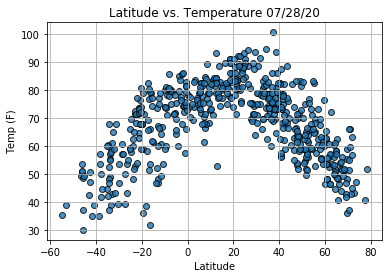

In [20]:
#Temp (F) vs. Latitude, using MatPlotLib
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties.
plt.title(f"Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("LatTemp.png")
# Show plot.
plt.show()

## Latitude vs. Humidity Plot

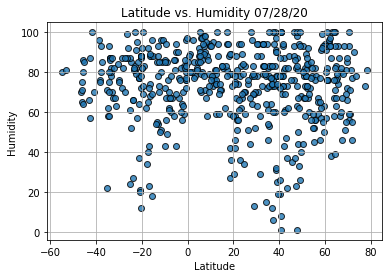

In [21]:
#Humidity (%) vs. Latitude, using MatPlotLib
# Build the scatter plot for Humidity (%) vs. Latitude.
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties.
plt.title(f"Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("LatHum.png")
# Show plot.
plt.show()

## Latitude vs. Cloudiness Plot

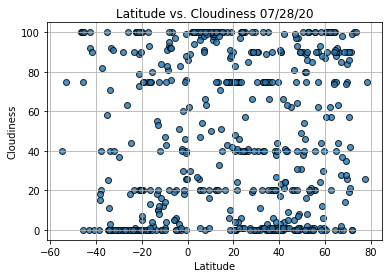

In [22]:
#Cloudiness (%) vs. Latitude, using MatPlotLib
# Build the scatter plot for Cloudiness (%) vs. Latitude.
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties.
plt.title(f"Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("LatCloud.png")
# Show plot.
plt.show()

## Latitude vs. Wind Speed Plot

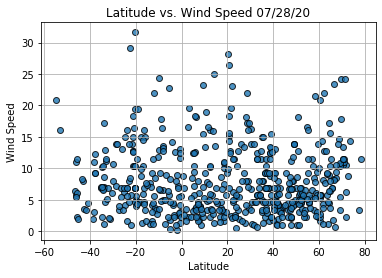

In [25]:
#Wind Speed (mph) vs. Latitude, using MatPlotLib
# Build the scatter plot for #Wind Speed (mph) vs. Latitude.
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties.
plt.title(f"Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("LatWind.png")
# Show plot.
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [38]:
#Create Northern Hemisphere DataFrame
nohemi = weather_data_df.loc[weather_data_df["Latitude"] >= 0.0]
nohemi.reset_index(inplace=True)

#Create Southern DataFrame
sohemi = weather_data_df.loc[weather_data_df["Latitude"] < 0.0]
sohemi.reset_index(inplace=True)

In [39]:
#display df
weather_data_df.head()

,City,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Khovd,64.04,50,0,2.06,48.01,91.64
1,Moscow,64.99,82,100,4.47,55.75,37.62
2,Albany,67.48,61,24,3.89,42.60,-73.97
3,Mataura,50.95,65,100,5.82,-46.19,168.86
4,Mahébourg,68.00,88,20,6.93,-20.41,57.70


In [74]:
# Define plotting function
def plotLineReg(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7165206010163141


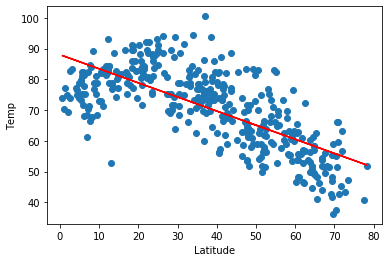

In [75]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Temp"
lblpos = (0,20)
plotLineReg(nohemi[xlbl],nohemi[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7092868697735751


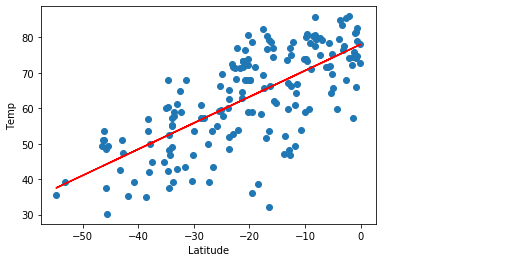

In [66]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Temp"
lblpos = (0,20)
plotLineReg(sohemi[xlbl],sohemi[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [49]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [50]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [51]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [52]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [53]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Observations:

#1)